In [14]:
import pandas as pd
#from sklearn.manifold import TSNE
from umap import UMAP
import nltk


#from cluster import ClusterVerbs
from eval_tensor import VerbTensorEvaluator

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 4)

Populating the interactive namespace from numpy and matplotlib


In [15]:
from nltk.corpus import verbnet as vn

In [3]:
evalor = VerbTensorEvaluator()

In [4]:
evalor.load_embeddings(cutoff=20000)

In [9]:
mapper = UMAP()#metric

In [11]:
verb_mx = mapper.fit_transform(evalor.decomped_tns.factors[1])

In [21]:
df = pd.DataFrame(evalor.index['ROOT'], columns=['verb'])

In [24]:
df['vnet'] = df.verb.apply(lambda verb: vn.classids(lemma=verb))

In [31]:
df = df.reset_index()

In [93]:
plt.rcParams['figure.figsize'] = [16, 8]

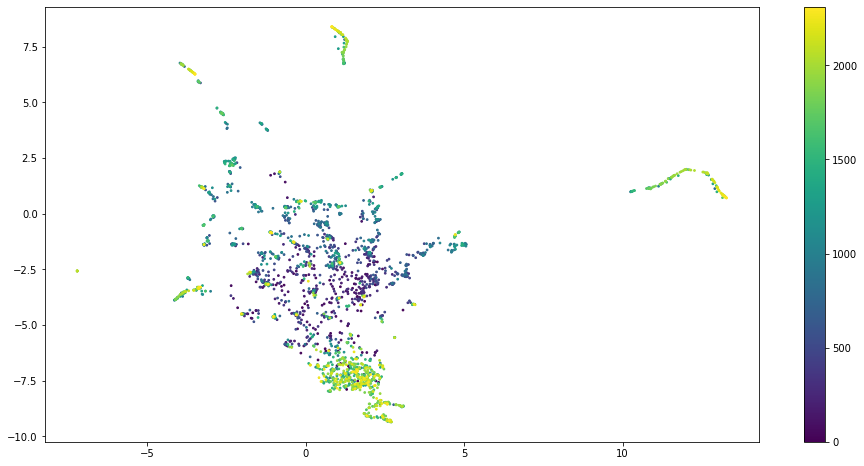

In [94]:
plt.scatter(*verb_mx.T, s=3, c=df.index)
plt.colorbar()

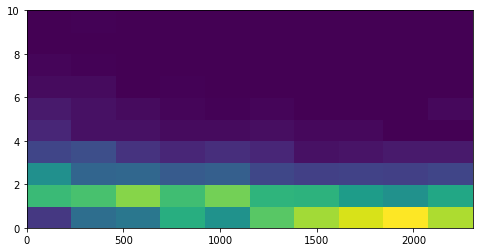

In [35]:
_ = plt.hist2d(df.index, df.vnet.str.len())

In [98]:
def least_class(classes):
    if classes:
        return min([int(class_.split('-')[1].split('.')[0]) for class_ in classes])
    else:
        return np.nan

In [120]:
df['least_class'] = df.vnet.apply(least_class)

In [105]:
df = df.fillna(df.least_class.max()+1)

In [119]:
df[df.vnet.str.len()==0]

,index,verb,vnet,least_class
0,0,be,[],95.0
1,1,have,[],95.0
3,3,do,[],95.0
35,35,seem,[],95.0
68,68,decide,[],95.0
...,...,...,...,...
2305,2305,reinforce,[],95.0
2306,2306,obstruct,[],95.0
2307,2307,rev,[],95.0
2309,2309,saith,[],95.0


In [121]:
df.groupby('least_class').size()

least_class
9.0     117
10.0     72
11.0     31
12.0      2
13.0    103
       ... 
87.0      3
89.0      1
90.0      5
93.0      1
94.0      3
Length: 78, dtype: int64

In [125]:
df[df.least_class==9].head()

,index,verb,vnet,least_class
37,37,put,[put-9.1-2],9.0
86,86,set,"[braid-41.2.2, force-59-1, image_impression-25...",9.0
100,100,stand,"[admire-31.2, assuming_position-50, put_spatia...",9.0
112,112,sit,"[assuming_position-50, put_spatial-9.2-1, spat...",9.0
133,133,raise,"[crane-40.3.2, put_direction-9.4]",9.0


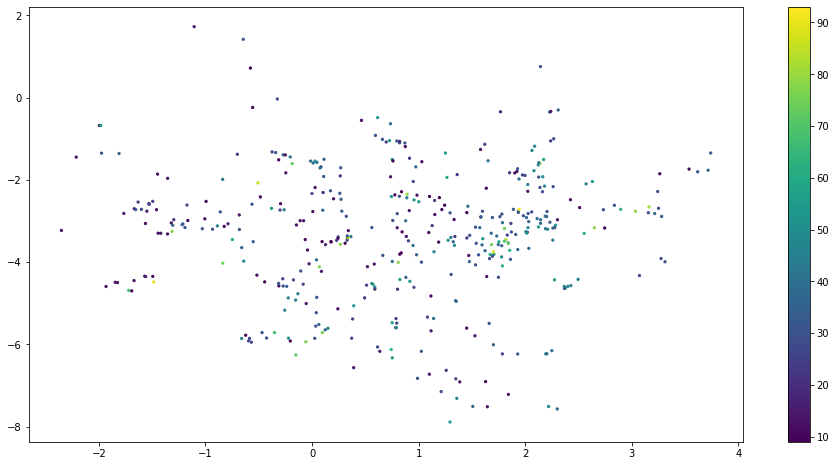

In [129]:
top = 500
plt.scatter(*verb_mx[:top].T, s=5, c=df.least_class[:top])#==9)
plt.colorbar()

In [3]:
cv = ClusterVerbs(weight='log_freq', rank=128, cutoff=100, clusser_dim=16)
df, labels = cv.main()

/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/umap/rp_tree.py:778: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"
/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/umap/rp_tree.py:778: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"


In [4]:
df['cluster'] = labels

In [5]:
df.head()

,0,cluster
0,NaN,-1
1,be,-1
2,have,-1
3,say,-1
4,do,-1


In [6]:
df[df.cluster==59]

,0,cluster
132,drive,59
140,walk,59
228,clear,59
303,travel,59
374,ride,59
381,fly,59
462,jump,59
500,cross,59
564,locate,59
709,climb,59
